In [5]:
# Import the dependencies

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
# Load the dataset

data = pd.read_csv('./dataset/Advertising Budget and Sales.csv')



In [11]:
# Peek at the data
data.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
# Removing the unnecessary column 'Unnamed: 0'  
data.drop(columns=['Unnamed: 0'], inplace=True)

Shape: (200, 4)

Columns: ['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)', 'Sales ($)']

Missing values:
 TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

Duplicate rows: 0

Data types:
 TV Ad Budget ($)           float64
Radio Ad Budget ($)        float64
Newspaper Ad Budget ($)    float64
Sales ($)                  float64
dtype: object

Statistical summary:


,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


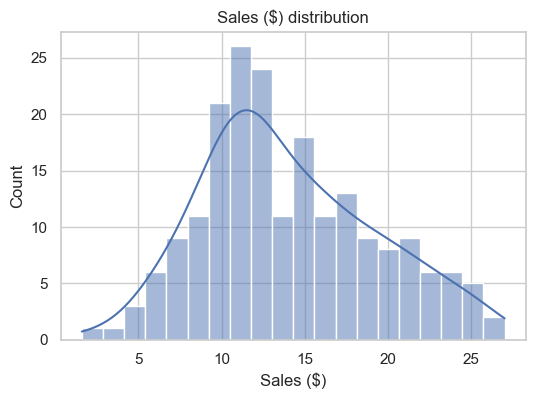

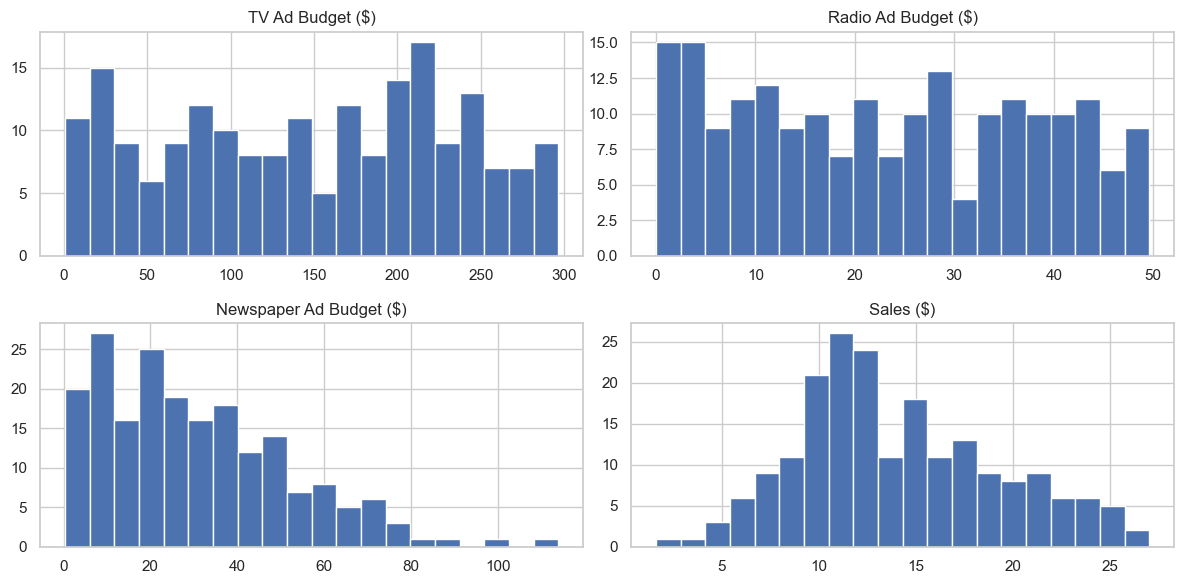

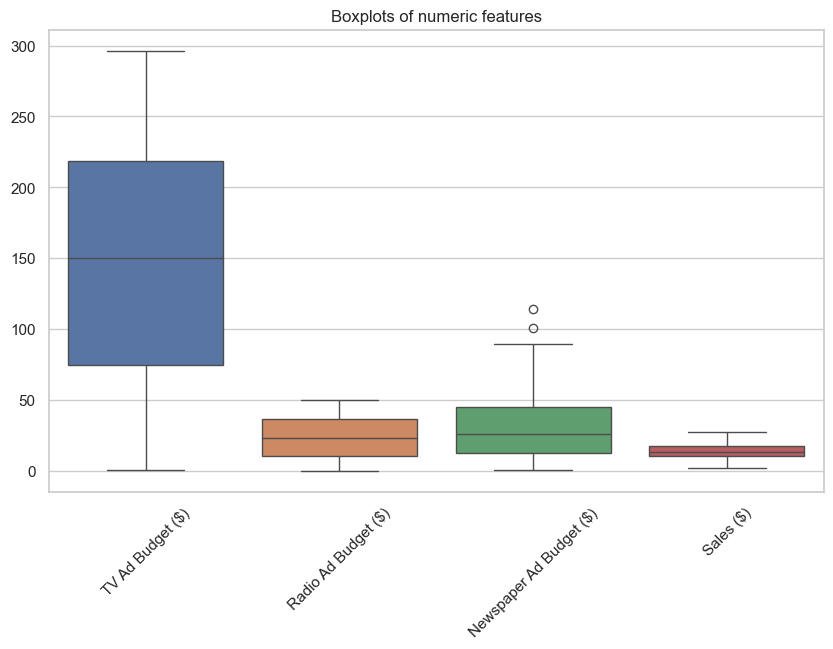

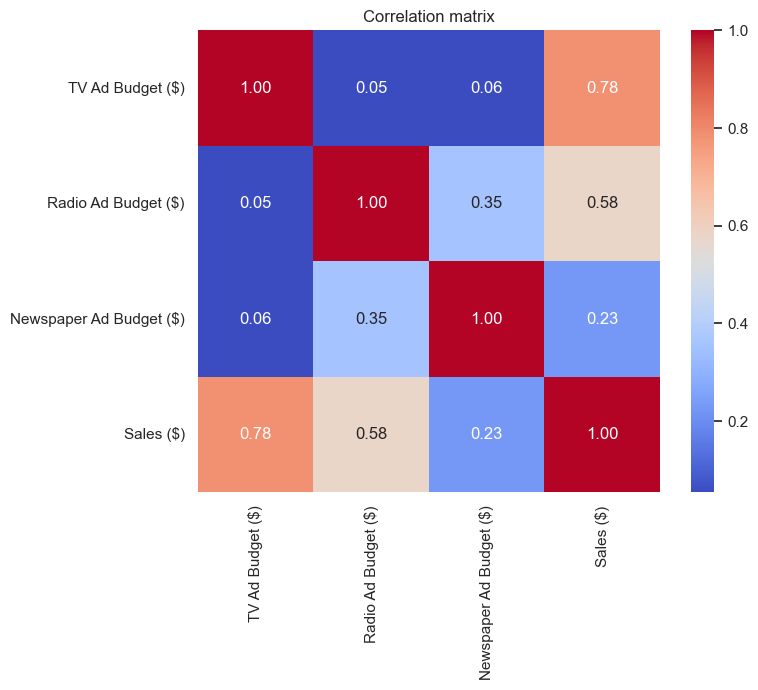

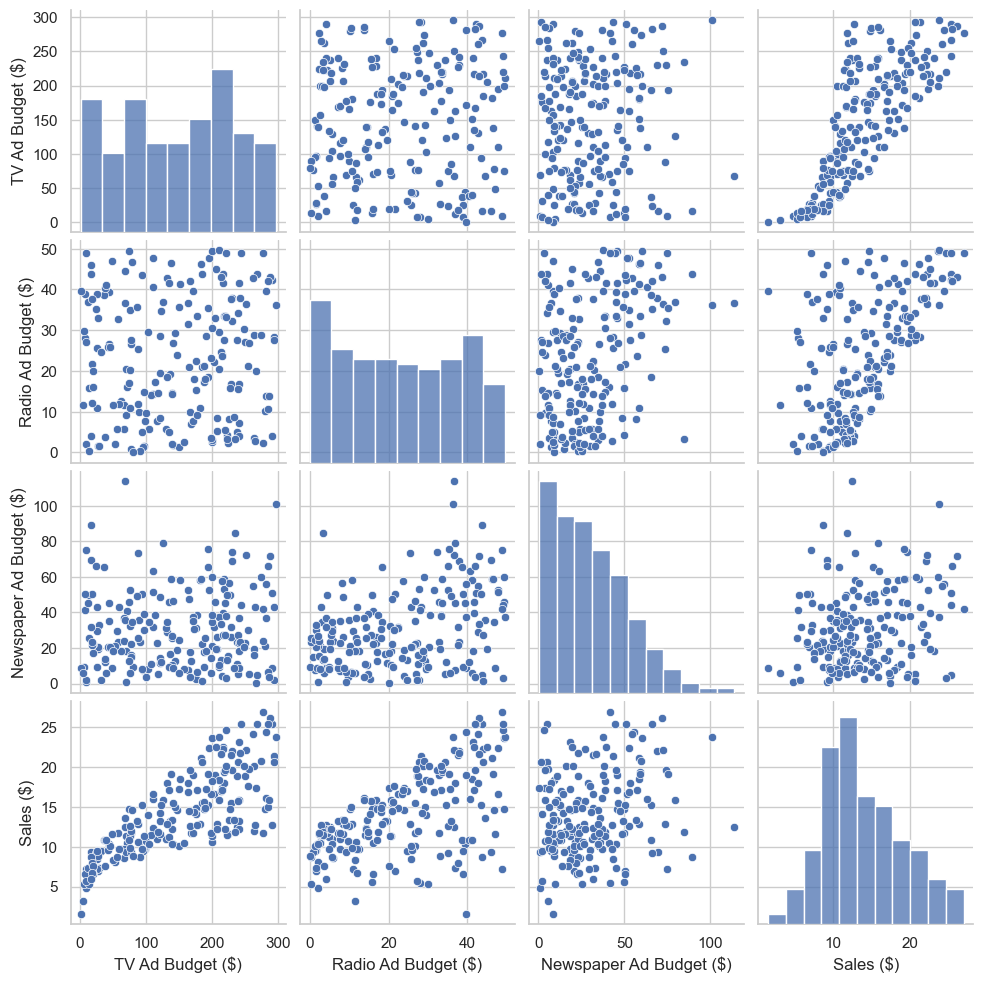

In [13]:
# Doing a simple EDA (Exploratory Data Analysis)

sns.set(style="whitegrid")

# Basic overview
print("Shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nMissing values:\n", data.isnull().sum())
print("\nDuplicate rows:", data.duplicated().sum())
print("\nData types:\n", data.dtypes)
print("\nStatistical summary:")
display(data.describe())

# Target distribution (adjust name if different)
if "Sales ($)" in data.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data["Sales ($)"], kde=True, bins=20)
    plt.title("Sales ($) distribution")
    plt.show()

# Histograms for numeric features
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if num_cols:
    data[num_cols].hist(figsize=(12, 6), bins=20)
    plt.tight_layout()
    plt.show()

# Boxplots for numeric features
if num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data[num_cols], orient="v")
    plt.title("Boxplots of numeric features")
    plt.xticks(rotation=45)
    plt.show()

# Correlation heatmap
corr = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation matrix")
plt.show()

# Pairplot (scatter + histograms) for numeric columns
if len(num_cols) <= 6:  # avoid very heavy plots for many features
    sns.pairplot(data[num_cols])
    plt.show()
else:
    print("Too many numeric columns for pairplot; skipping.")       



In [14]:
# Function to split the dataset to train and test sets


def get_train_test_data(
    csv_path="./dataset/Advertising Budget and Sales.csv",
    test_size=0.2,
    random_state=42,
):
    """
    Load data, do very light cleaning, and return train/test splits.
    """

    # 1. Load
    df = pd.read_csv(csv_path)

    # 2. Basic clean (drop missing rows if any)
    df = df.dropna()

    # 3. Features and target
    feature_cols = ["TV Ad Budget ($)", "Radio Ad Budget ($)", "Newspaper Ad Budget ($)"]  # adjust if your columns differ
    X = df[feature_cols]
    y = df["Sales ($)"]

    # 4. Train / test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    return X_train, X_test, y_train, y_test

In [15]:
# Training and evaluating few models

# 1. Get processed data
X_train, X_test, y_train, y_test = get_train_test_data()

# 2. Define a couple of simple models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(
        n_estimators=200, random_state=42
    ),
}

# 3. Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n=== {name} ===")
    print(f"MAE : {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²  : {r2:.3f}")


=== LinearRegression ===
MAE : 1.461
RMSE: 1.782
R²  : 0.899

=== RandomForestRegressor ===
MAE : 0.629
RMSE: 0.757
R²  : 0.982


In [16]:
# Creating and loading the linear regression model for inference

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "model.pkl")

['model.pkl']

In [ ]:
## Small Excercise : Train and save the RandomForestRegressor model in a similar way 